In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("./data/944.csv")
df

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,...,vv,TMP,HR,PRB,RS,LL,BEN,TOL,MXIL,PM25
0,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,24,2.0,1.0,11.0,NaN,...,1.59,14.1,75.0,1015.0,56.0,0.0,0.04,0.03,0.03,11.0
1,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,23,5.0,1.0,8.0,NaN,...,2.22,14.1,73.0,1015.0,56.0,0.0,0.02,0.02,0.03,10.0
2,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,22,2.0,1.0,6.0,NaN,...,1.86,14.6,69.0,1014.0,56.0,0.0,0.02,0.02,0.03,12.0
3,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,21,1.0,3.0,13.0,NaN,...,2.11,17.7,46.0,1014.0,56.0,0.0,0.02,0.05,0.03,14.0
4,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,20,1.0,1.0,10.0,NaN,...,2.51,20.1,29.0,1012.0,56.0,0.0,0.02,0.02,0.03,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,5,4.0,2.0,22.0,0.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43796,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,4,3.0,3.0,28.0,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43797,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,3,4.0,13.0,31.0,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43798,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,2,3.0,5.0,35.0,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.isna().sum()

Estación        0
Título          0
latitud         0
longitud        0
Fecha           0
Periodo         0
SO2          9530
NO           1414
NO2          1418
CO          18073
PM10         1164
O3           9674
dd          26404
vv          26404
TMP         28046
HR          27393
PRB         27393
RS          27393
LL          27393
BEN         35238
TOL         35238
MXIL        35238
PM25        18498
dtype: int64

In [29]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
na_ratio

MXIL        80.452055
TOL         80.452055
BEN         80.452055
TMP         64.031963
LL          62.541096
RS          62.541096
PRB         62.541096
HR          62.541096
dd          60.283105
vv          60.283105
PM25        42.232877
CO          41.262557
O3          22.086758
SO2         21.757991
NO2          3.237443
NO           3.228311
PM10         2.657534
Título       0.000000
Periodo      0.000000
Fecha        0.000000
longitud     0.000000
latitud      0.000000
Estación     0.000000
dtype: float64

In [9]:
#Me quedo con los principales agentes contaminantes, datos inferiores de 50% de nan

df1 = df.drop(["dd","vv","TMP","HR","PRB", "RS", "LL","BEN","TOL","MXIL"], axis= 1)
df1

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
0,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,24,2.0,1.0,11.0,NaN,29.0,54.0,11.0
1,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,23,5.0,1.0,8.0,NaN,32.0,66.0,10.0
2,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,22,2.0,1.0,6.0,NaN,33.0,78.0,12.0
3,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,21,1.0,3.0,13.0,NaN,36.0,67.0,14.0
4,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,20,1.0,1.0,10.0,NaN,39.0,71.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,5,4.0,2.0,22.0,0.49,26.0,3.0,NaN
43796,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,4,3.0,3.0,28.0,0.51,31.0,4.0,NaN
43797,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,3,4.0,13.0,31.0,0.69,50.0,2.0,NaN
43798,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,2,3.0,5.0,35.0,0.65,42.0,4.0,NaN


In [24]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Estación  43800 non-null  int64  
 1   Título    43800 non-null  object 
 2   latitud   43800 non-null  float64
 3   longitud  43800 non-null  float64
 4   Fecha     43800 non-null  object 
 5   Periodo   43800 non-null  int64  
 6   SO2       34270 non-null  float64
 7   NO        42386 non-null  float64
 8   NO2       42382 non-null  float64
 9   CO        25727 non-null  float64
 10  PM10      42636 non-null  float64
 11  O3        34126 non-null  float64
 12  PM25      25302 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 4.3+ MB


In [6]:
df1.head()

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
0,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,24,2.0,1.0,11.0,NaN,29.0,54.0,11.0
1,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,23,5.0,1.0,8.0,NaN,32.0,66.0,10.0
2,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,22,2.0,1.0,6.0,NaN,33.0,78.0,12.0
3,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,21,1.0,3.0,13.0,NaN,36.0,67.0,14.0
4,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,20,1.0,1.0,10.0,NaN,39.0,71.0,16.0


In [7]:
df1.tail()

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
43795,4,Estación Avenida Castilla,43.53794,-5.645951,2022-01-01,5,4.0,2.0,22.0,0.49,26.0,3.0,NaN
43796,4,Estación Avenida Castilla,43.53794,-5.645951,2022-01-01,4,3.0,3.0,28.0,0.51,31.0,4.0,NaN
43797,4,Estación Avenida Castilla,43.53794,-5.645951,2022-01-01,3,4.0,13.0,31.0,0.69,50.0,2.0,NaN
43798,4,Estación Avenida Castilla,43.53794,-5.645951,2022-01-01,2,3.0,5.0,35.0,0.65,42.0,4.0,NaN
43799,4,Estación Avenida Castilla,43.53794,-5.645951,2022-01-01,1,5.0,10.0,31.0,0.56,37.0,14.0,NaN


In [8]:
df1.describe()

,Estación,latitud,longitud,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
count,43800.000000,43800.000000,43800.000000,43800.000000,34270.000000,42386.000000,42382.000000,25727.000000,42636.000000,34126.000000,25302.000000
mean,5.600000,43.528977,-5.676303,12.500000,3.432011,7.029373,17.085013,0.336702,27.353293,45.950946,11.977591
std,4.128001,0.008709,0.018240,6.922266,3.519206,14.475589,13.263650,0.364656,19.744709,25.894656,8.567170
min,1.000000,43.517315,-5.698930,1.000000,1.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000
25%,2.000000,43.520957,-5.690707,6.750000,1.000000,1.000000,7.000000,0.130000,15.000000,24.000000,7.000000
50%,4.000000,43.529806,-5.673428,12.500000,2.000000,3.000000,13.000000,0.290000,24.000000,47.000000,10.000000
75%,10.000000,43.537940,-5.672499,18.250000,4.000000,6.000000,23.000000,0.410000,34.000000,65.000000,15.000000
max,11.000000,43.538869,-5.645951,24.000000,78.000000,330.000000,105.000000,10.960000,667.000000,149.000000,168.000000


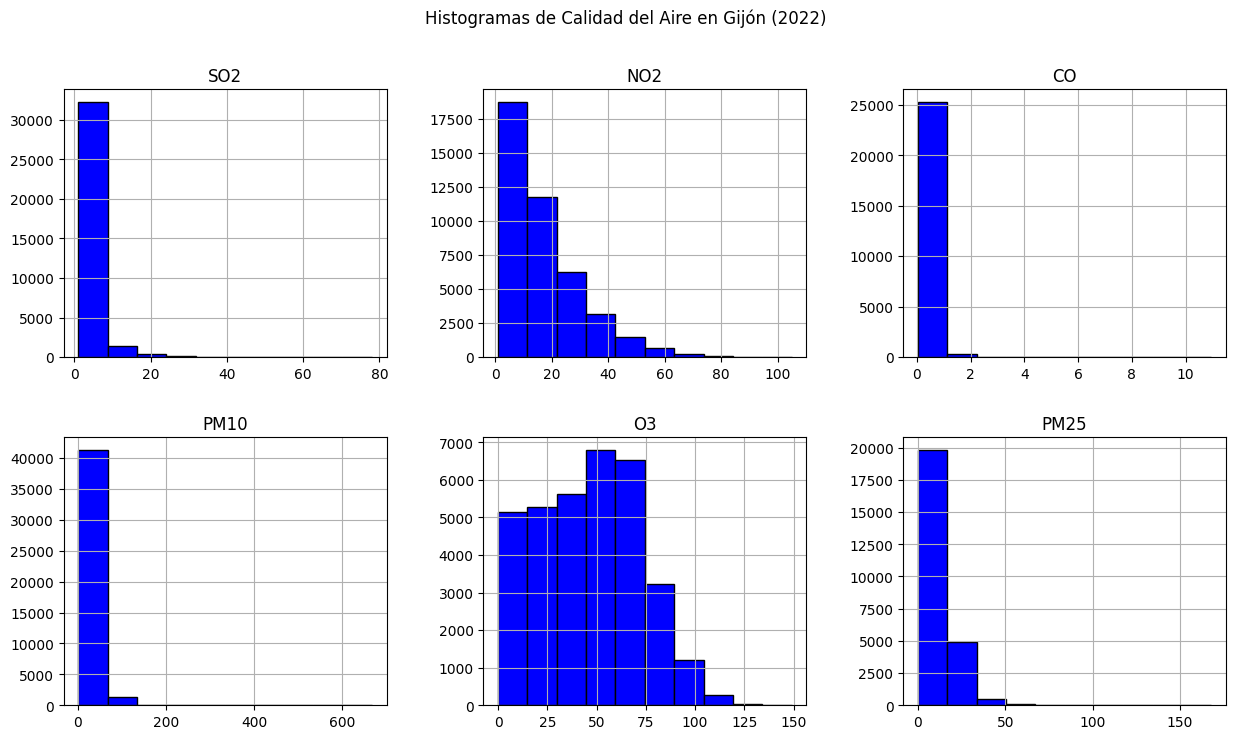

In [32]:
variables = ['SO2', 'NO2', 'CO', 'PM10', 'O3', 'PM25']

# Crear subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Histogramas de Calidad del Aire en Gijón (2022)')

# Rellenar subgráficos con histogramas desde el DataFrame
df[variables].hist(ax=axes, bins=10, color='blue', edgecolor='black')

# Mostrar la figura
plt.show()

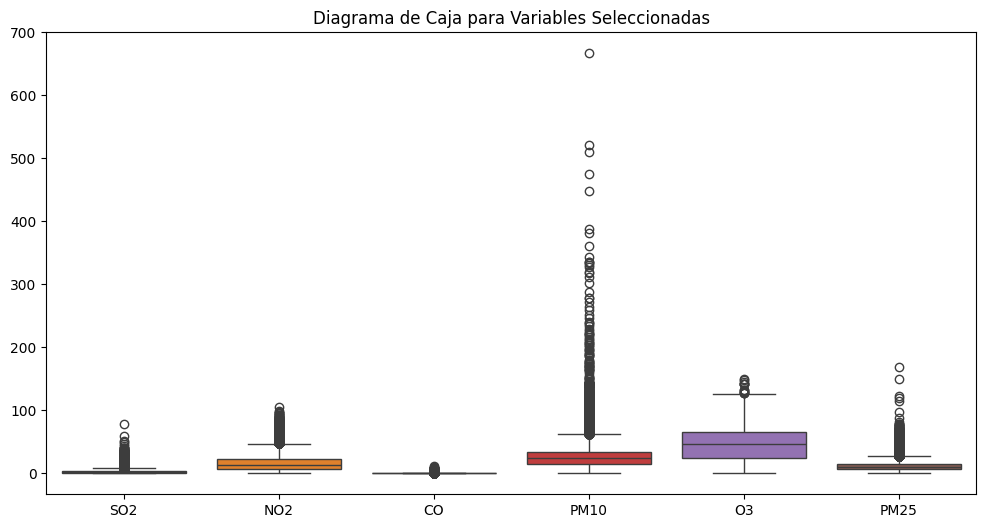

In [33]:
# Crear un boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables])
plt.title('Diagrama de Caja para Variables Seleccionadas')
plt.show()

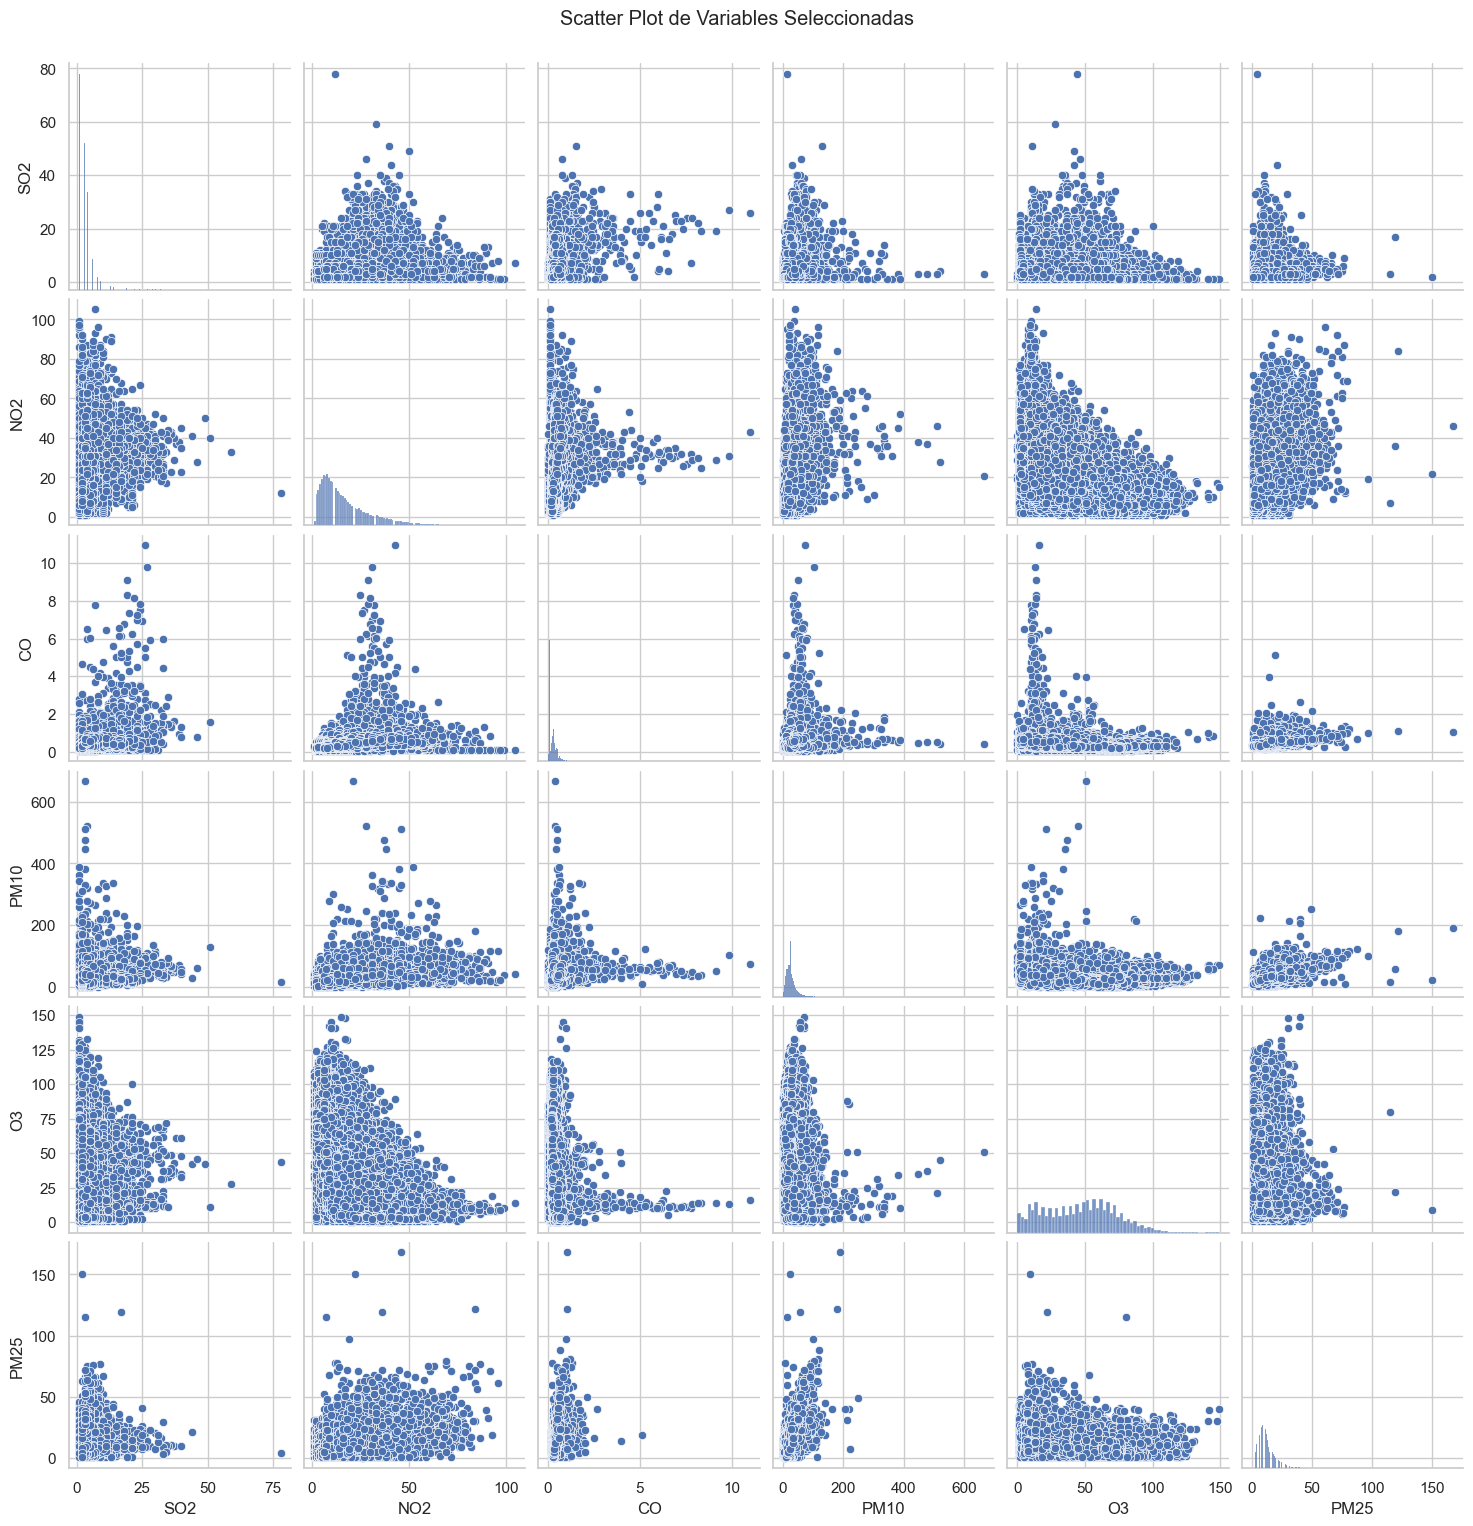

In [39]:
# Crear un scatter plot
#variablesfil = df[variables].dropna()
sns.set(style="whitegrid")  # Estilo del gráfico
sns.pairplot(df1[variables], height=2.5)
plt.suptitle('Scatter Plot de Variables Seleccionadas', y=1.02)
plt.show()

In [10]:
dfest = df1.drop(["Estación", "Título","Fecha","latitud", "longitud", "Periodo"], axis= 1)

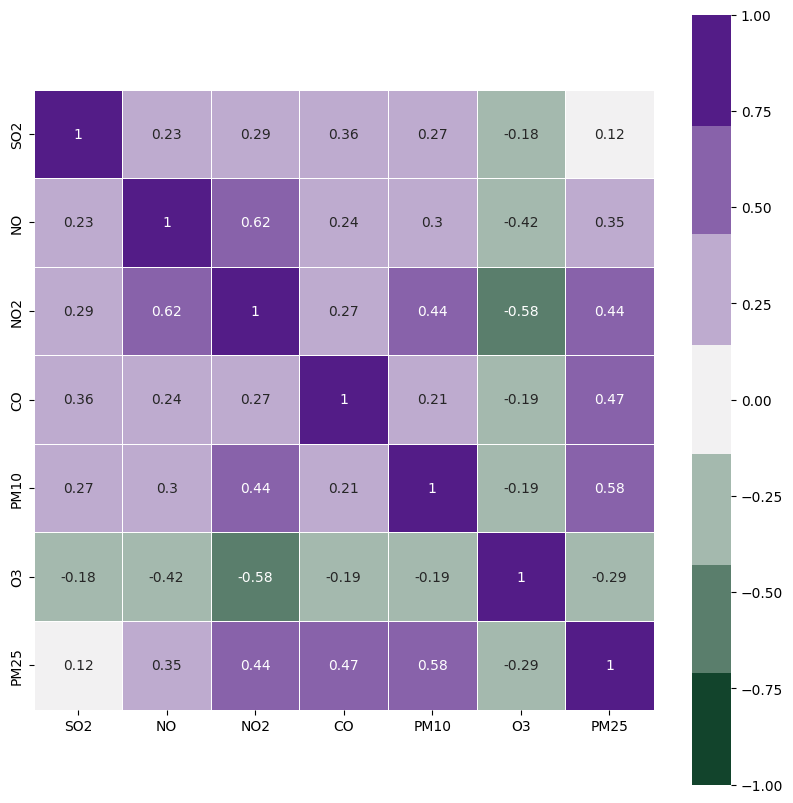

In [11]:
#ANÁLISIS MULTIVARIANTE

plt.figure(figsize=(10,10))
sns.heatmap(dfest.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5, annot=True);